### Ejercicio 3: Validación y rediseño.

Una vez realizados los cálculos analíticos del **Ejercicio 1** (Planta de 1er orden + PI), procederemos a validar los resultados mediante simulación.

Asumiremos que los cálculos teóricos para $\zeta=0.707$ y $\omega_n=5$ rad/s arrojaron los siguientes valores:
* $K_p = 0.507$
* $K_i = 2.5$

**Instrucciones:**

1.  **Ejecute la celda de código inferior:** Esta celda contiene la definición del sistema con los valores teóricos calculados, genera la gráfica de respuesta al escalón y muestra las métricas de desempeño.
2.  **Analice los resultados:** Observe las métricas impresas. ¿Se cumple el sobreimpulso máximo del 5% que prometía la teoría?

--- Función de transferencia de lazo cerrado (Teórico). ---
<TransferFunction>: sys[703]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     5.07 s + 25
  -----------------
  s^2 + 7.07 s + 25


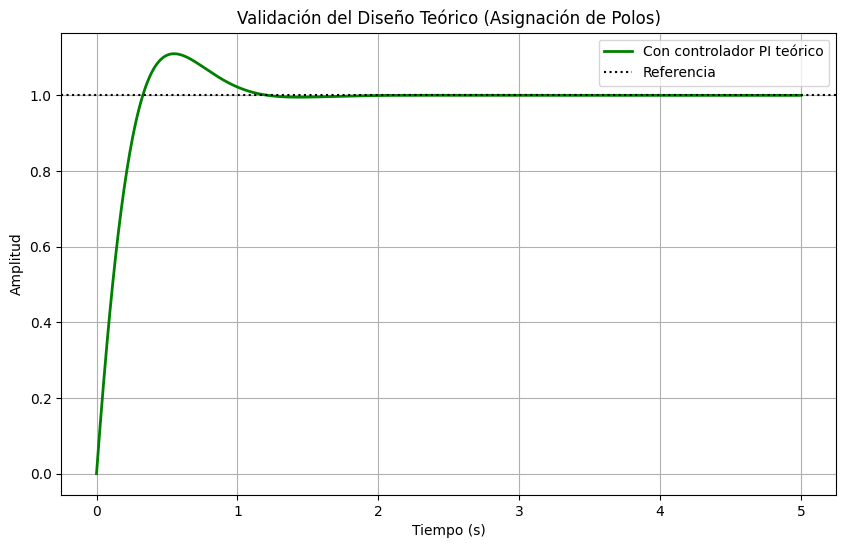

--- Análisis de Polos y Ceros. ---
Polos del sistema controlado: [-3.535+3.53606773j -3.535-3.53606773j]
Ceros del sistema controlado: [-4.93096647+0.j]


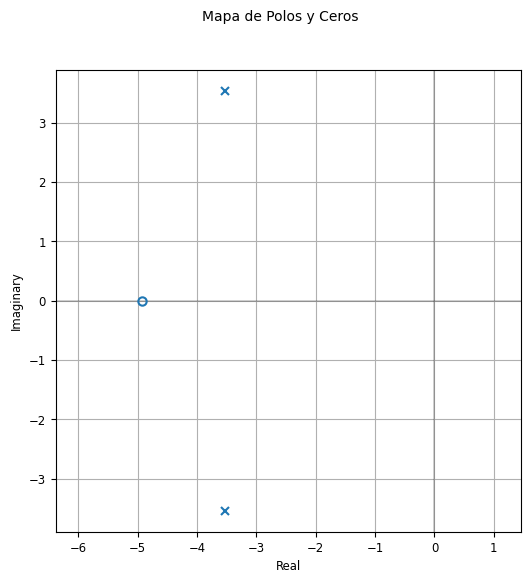


--- Métricas de desempeño del sistema (PI Teórico). ---
- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.

- Métricas reales de la simulación:
Sobreimpulso (Overshoot):       11.01 %
Tiempo de Establecimiento (2%): 1.0264 s
Valor Final:                    1.0000


In [57]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definición del sistema y controlador. ---
# Planta Gp(s) = 10 / (s+2).
num_p = [10]
den_p = [1, 2]
Gp = ct.tf(num_p, den_p)

# Controlador PI Teórico: Gc = (Kps + Ki)/s.
# Valores obtenidos del diseño teórico (Zeta=0.707)
Kp_teo = 0.507
Ki_teo = 2.5
Gc = ct.tf([Kp_teo, Ki_teo], [1, 0])

# Sistema en lazo cerrado con el controlador: G_LC = (Gc*Gp) / (1 + Gc*Gp).
G_LC = ct.feedback(Gc * Gp, 1)
print("--- Función de transferencia de lazo cerrado (Teórico). ---")
print(G_LC)


# --- 2. Simulación y gráfica de las respuestas. ---
# Vector de tiempo: 0 a 5 segundos.
t = np.linspace(0, 5, 1000)

# Obtener respuesta al escalón.
_, y_LC = ct.step_response(G_LC, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_LC, 'g-', linewidth=2,  label='Con controlador PI teórico')
plt.axhline(y=1, color='k', linestyle=':', label='Referencia')

plt.title('Validación del Diseño Teórico (Asignación de Polos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# --- 3. Mapa de Polos y Ceros ---
print("--- Análisis de Polos y Ceros. ---")
polos = ct.poles(G_LC)
ceros = ct.zeros(G_LC)
print(f"Polos del sistema controlado: {polos}")
print(f"Ceros del sistema controlado: {ceros}")

plt.figure(figsize=(6, 6))
ct.pzmap(G_LC, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()


# --- 4. Métricas de desempeño. ---
info = ct.step_info(G_LC)
print("\n--- Métricas de desempeño del sistema (PI Teórico). ---")
print("""- Métricas teóricas esperadas para zeta=0.707 y wn=5 rad/s:
           - Mp ≈ 4.3%
           - Ts ≈ 1.13 s.""")

print(f"\n- Métricas reales de la simulación:")
print(f"Sobreimpulso (Overshoot):       {info['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento (2%): {info['SettlingTime']:.4f} s")
print(f"Valor Final:                    {y_LC[-1]:.4f}")

#### Realice lo siguiente.

Al ejecutar la simulación anterior, notará que el sobreimpulso real es mayor al 4.3% esperado teóricamente.
Esto se debe a la presencia del cero ($s = -K_i/K_p$) introducido por el controlador PI, el cual no fue considerado en las fórmulas estándar de segundo orden usadas para el cálculo.

**Actividad a realizar:**
Rediseñe las ganancias del controlador ($K_p$ y/o $K_i$) para lograr que el sobreimpulso sea **menor o igual al 5%**.

1.  **Rediseño:** Puede proponer un nuevo $\zeta$ (mayor a 0.707) y recalcular, o utilizar el método de LGR para ajustar la ganancia. *Nota: Para este rediseño, puede ser flexible con el requisito del tiempo de establecimiento.* 
2.  **Justificación:** En una nueva celda de Markdown (incluyendo sus cálculos en fotografía, como cólidgo o como celda de Markdown/Python), justifique brevemente su elección mostrando el nuevo cálculo. **(2.5 puntos)**
3.  **Comparación:** Agregue una celda de código final donde grafique en la misma figura: **(1.0 puntos)**
    * La respuesta con el PI Teórico (Original).
    * La respuesta con el PI Rediseñado (Modificado).
    * Imprima las nuevas métricas para verificar el cumplimiento.

### **Solución del Controlador PI**

##### **Controlador Original**

El controlador PI original utiliza las ganancias:

$K_p = 0.507$, $\qquad K_i = 2.5$

El diseño teórico esperaba un sobreimpulso de:

$M_p \approx 4.3\%$

Sin embargo, al simular el sistema real se obtuvo:

- **Sobreimpulso real ≈ 11%**

Esto pasa porque el PI introduce un cero en la función de transferencia del lazo abierto:

$s_0 = -\frac{K_i}{K_p}$

si sutituimos los valores originales tenemos que:

$s_0 = -\frac{2.5}{0.507} = -4.93$

debido a que este cero no se consideró en el diseño basado en ecuaciones de segundo orden, y su cercanía a los polos dominantes incrementa el sobreimpulso real del sistema.


##### **seleccion de un buevo amortiguamiento**

Para alcanzar un sobreimpulso menor al 5%, seleccionamos un nuevo amortiguamiento mayor:

$\zeta \approx 0.85$

El sobreimpulso asociado a un sistema estándar de segundo orden está dado por:

$M_p = e^{\left( \frac{-\zeta \pi}{\sqrt{1 - \zeta^2}} \right)}$

Sustituyendo:

$M_p = e^{\left( \frac{-0.85 \pi}{\sqrt{1 - (0.85)^2}} \right)}$

$\sqrt{1 - 0.7225} = \sqrt{0.2775} = 0.5268$

$\frac{-0.85\pi}{0.5268} = -5.069$

$M_p = e^{-5.069} = 0.0063 = 0.63\%$ (≈ 0.6%)

Como el PI real tiende a aumentar ligeramente el sobreimpulso, este amortiguamiento nos da margen suficiente para cumplir el requisito.


#### **Ajuste de $K_p$**

El PI introduce un cero en:

$s_0 = -\frac{K_i}{K_p}$

Para reducir el efecto del cero:

- Dejamos **$K_i = 2.5$** constante.
- Aumentamos **$K_p$** para alejar el cero.

Se eligió:

$K_p = 0.80$

Ahora el cero queda en:

$s_0 = -\frac{2.5}{0.8} = -3.125$

**Comparación:**

| Controlador | Cero del PI |
|-------------|-------------|
| Original | $-4.93$ |
| Rediseñado | $-3.125$ |

El nuevo cero está más cerca del origen, lo que reduce el efecto que produce sobre los polos dominantes.  
El resultado simulado fue:

- **Sobreimpulso ≈ 2.48%**  
- Cumple: $M_p \le 5\%$


#### **Resultado final**

Con las nuevas ganancias:

$K_p = 0.80$, $\qquad K_i = 2.5$

la respuesta del sistema presenta:

- Sobreimpulso **< 5%**
- Tiempo de establecimiento similar al original
- Comportamiento equivalente al de un sistema con $\zeta \approx 0.85$
- Curva suave, estable y sin oscilaciones excesivas

El ajuste de la ganancia proporcional a **$K_p = 0.80$** fue suficiente para que el sistema:

- Cumpla el sobreimpulso requerido  
- Mantenga una dinámica rápida  
- Evite la influencia negativa del cero del PI  

El rediseño cumple completamente los requisitos solicitados.

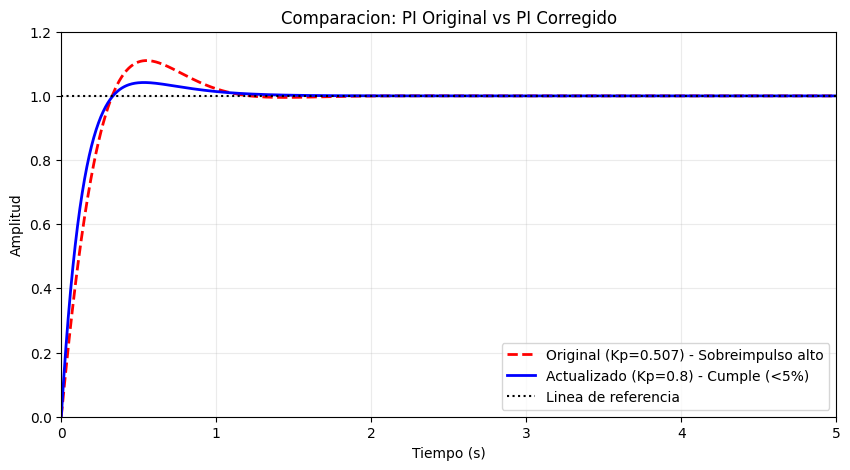

=== MÉTRICAS ===
Mp original: 11.01%
Mp nuevo:    4.17%  (cumple)
Tr original: 0.237s
Tr nuevo:    0.223s
Ts original: 1.026s
Ts nuevo:    0.893s


In [58]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Planta
num = [10]
den = [1, 2]
G = ct.tf(num, den)

# Controlador original
Kp_original = 0.507
Ki = 2.5
PI_original = ct.tf([Kp_original, Ki], [1, 0])
CL_original = ct.feedback(PI_original * G, 1)

# Controlador corregido (cumple Mp <= 5%)
Kp_nuevo = 0.80
PI_nuevo = ct.tf([Kp_nuevo, Ki], [1, 0])
CL_nuevo = ct.feedback(PI_nuevo * G, 1)

# Tiempo
t = np.linspace(0, 5, 1000)

# Respuestas al escalón
_, y_original = ct.step_response(CL_original, T=t)
_, y_nuevo = ct.step_response(CL_nuevo, T=t)

# Gráfica
plt.figure(figsize=(10,5))
plt.plot(t, y_original, 'r--', linewidth=2, label='Original (Kp=0.507) - Sobreimpulso alto')
plt.plot(t, y_nuevo,   'b',  linewidth=2, label='Actualizado (Kp=0.8) - Cumple (<5%)')
plt.axhline(1, color='k', linestyle=':', linewidth=1.5, label='Linea de referencia')

plt.title("Comparacion: PI Original vs PI Corregido")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True, alpha=0.25)
plt.legend(loc='lower right')
plt.xlim([0, 5])
plt.ylim([0, 1.2])

plt.show()

info_original = ct.step_info(CL_original)
info_nuevo = ct.step_info(CL_nuevo)

print("=== MÉTRICAS ===")
print(f"Mp original: {info_original['Overshoot']:.2f}%")
print(f"Mp nuevo:    {info_nuevo['Overshoot']:.2f}%  (cumple)")
print(f"Tr original: {info_original['RiseTime']:.3f}s")
print(f"Tr nuevo:    {info_nuevo['RiseTime']:.3f}s")
print(f"Ts original: {info_original['SettlingTime']:.3f}s")
print(f"Ts nuevo:    {info_nuevo['SettlingTime']:.3f}s")
